# Практическая работа №1
## Королев Павел Александрович

# Цель:
Знакомство с основными задачами предварительной
обработки исходных данных, изучение основных методов
предварительной обработки данных, формирование навыков
выполнения предварительной обработки исходных данных с
помощью языка программирования Python.

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from IPython.display import Image

In [2]:
data_frame = pd.read_excel('first_practice_dataframe.xlsx')
data_frame = data_frame[['cat5_customerSatisfaction', 'cat1_gender', 'num1_10', 'num2_10', 'num3_10']]
data_frame

cat5_customerSatisfaction cat1_gender      num1_10     num2_10  num3_10
0                        good        male  1952.951114  -14.984191         
1                        Good        male   248.952820   15.251861  624.089
2                        Good        male   465.578792   72.069553        -
3                   Very good         NaN   746.798307  -61.282697  702.582
4                   Very good        male   -92.649660   11.401243  738.488
..                        ...         ...          ...         ...      ...
995                   Neutral        male -1239.039630   49.175988  729.443
996                   Neutral        male  -313.300265  129.241360  631.932
997                      poor        male   898.772621    3.237211  612.758
998                      Good         NaN  -484.127869   23.486792  486.161
999                      Good        male    45.858965   88.174203  598.079

[1000 rows x 5 columns]

# Тут, как ни странно, задание 2

кусочек валяется в графиках

In [3]:
data_frame.describe()

num1_10     num2_10
count  1000.000000  952.000000
mean   -348.262016   -0.416448
std    2363.300870   44.123403
min   -9999.000000 -140.129425
25%    -548.516962  -27.246439
50%      86.667447   -1.601830
75%     682.738284   26.391433
max    3172.179061  138.457461

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cat5_customerSatisfaction  981 non-null    object 
 1   cat1_gender                982 non-null    object 
 2   num1_10                    1000 non-null   float64
 3   num2_10                    952 non-null    float64
 4   num3_10                    970 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [5]:
data_frame.cat5_customerSatisfaction.unique()

array(['good', 'Good', 'Very good', 'Neutral', '-', 'Very poor', 'poor',
       'Poor', ' ', nan], dtype=object)

In [6]:
data_frame.cat5_customerSatisfaction.value_counts()

Good         208
good         195
Very good    192
Neutral      119
Very poor     94
Poor          81
poor          53
-             20
              19
Name: cat5_customerSatisfaction, dtype: int64

Изменить регистр для good и poor


Убрать "-" и " "

In [7]:
data_frame["cat5_customerSatisfaction"] = data_frame["cat5_customerSatisfaction"].replace({"good" : "Good"})
data_frame["cat5_customerSatisfaction"] = data_frame["cat5_customerSatisfaction"].replace({"poor" : "Poor"})
data_frame["cat5_customerSatisfaction"] = data_frame["cat5_customerSatisfaction"].replace({"-" : np.nan})
data_frame["cat5_customerSatisfaction"] = data_frame["cat5_customerSatisfaction"].replace({" " : np.nan})
data_frame.cat5_customerSatisfaction.value_counts()

Good         403
Very good    192
Poor         134
Neutral      119
Very poor     94
Name: cat5_customerSatisfaction, dtype: int64

In [8]:
data_frame.cat1_gender.unique()

array(['male', nan, 'female', 'Male', '-', 'Female', ' '], dtype=object)

In [9]:
data_frame.cat1_gender.value_counts()

male      633
Male      156
female    126
Female     28
-          20
           19
Name: cat1_gender, dtype: int64

In [10]:
data_frame["cat1_gender"] = data_frame["cat1_gender"].replace({"Male" : "male"})
data_frame["cat1_gender"] = data_frame["cat1_gender"].replace({"Female" : "female"})
data_frame["cat1_gender"] = data_frame["cat1_gender"].replace({"-" : np.nan})
data_frame["cat1_gender"] = data_frame["cat1_gender"].replace({" " : np.nan})
data_frame.cat1_gender.value_counts()

male      789
female    154
Name: cat1_gender, dtype: int64

In [11]:
data_frame.num3_10.unique()

array([' ', 624.0885587122389, '-', 702.582061045618, 738.4877893936774,
       488.5560252807131, 503.2591227770648, 610.0233109306473,
       445.3090371839023, 475.2422789334098, 732.545118001459,
       521.3010979642835, nan, 582.7742983993118, 1022.403801248672,
       469.4789240032973, 775.7824643094068, 650.7165214529266,
       786.6032902809212, 661.8672674167427, 809.6364467399492,
       444.4121753061058, 466.6584743069263, 757.9242301400332,
       727.1177308976188, 715.9681652695264, 595.3730521955483,
       561.0359356117197, 616.9541319288498, 759.0745351680964,
       487.1203958478634, 618.0547799367665, 563.5594470697174,
       272.053815492021, 621.3304430943733, 481.0387657350035,
       663.8934326970623, 501.5557104493001, 615.9766698574404,
       491.8112388704477, 693.6048363916707, 662.0013484222139,
       856.7233317868537, 491.0267970297182, 558.8259932933619,
       689.7553266621891, 731.7822962332024, 824.1807413363135,
       786.7441461780784, 76

In [12]:
data_frame.num3_10.unique()

array([' ', 624.0885587122389, '-', 702.582061045618, 738.4877893936774,
       488.5560252807131, 503.2591227770648, 610.0233109306473,
       445.3090371839023, 475.2422789334098, 732.545118001459,
       521.3010979642835, nan, 582.7742983993118, 1022.403801248672,
       469.4789240032973, 775.7824643094068, 650.7165214529266,
       786.6032902809212, 661.8672674167427, 809.6364467399492,
       444.4121753061058, 466.6584743069263, 757.9242301400332,
       727.1177308976188, 715.9681652695264, 595.3730521955483,
       561.0359356117197, 616.9541319288498, 759.0745351680964,
       487.1203958478634, 618.0547799367665, 563.5594470697174,
       272.053815492021, 621.3304430943733, 481.0387657350035,
       663.8934326970623, 501.5557104493001, 615.9766698574404,
       491.8112388704477, 693.6048363916707, 662.0013484222139,
       856.7233317868537, 491.0267970297182, 558.8259932933619,
       689.7553266621891, 731.7822962332024, 824.1807413363135,
       786.7441461780784, 76

Тупо, но зато видно ненужные значения)))

In [13]:
data_frame["num3_10"] = data_frame["num3_10"].replace({"-" : np.nan})
data_frame["num3_10"] = data_frame["num3_10"].replace({" " : np.nan}) 
data_frame.describe()

num1_10     num2_10      num3_10
count  1000.000000  952.000000   912.000000
mean   -348.262016   -0.416448   646.496853
std    2363.300870   44.123403   132.044057
min   -9999.000000 -140.129425   220.302131
25%    -548.516962  -27.246439   541.761379
50%      86.667447   -1.601830   648.244155
75%     682.738284   26.391433   751.201497
max    3172.179061  138.457461  1078.674453

# Тут 1 задание

In [14]:
data_frame

cat5_customerSatisfaction cat1_gender      num1_10     num2_10     num3_10
0                        Good        male  1952.951114  -14.984191         NaN
1                        Good        male   248.952820   15.251861  624.088559
2                        Good        male   465.578792   72.069553         NaN
3                   Very good         NaN   746.798307  -61.282697  702.582061
4                   Very good        male   -92.649660   11.401243  738.487789
..                        ...         ...          ...         ...         ...
995                   Neutral        male -1239.039630   49.175988  729.443313
996                   Neutral        male  -313.300265  129.241360  631.931844
997                      Poor        male   898.772621    3.237211  612.757921
998                      Good         NaN  -484.127869   23.486792  486.160999
999                      Good        male    45.858965   88.174203  598.078783

[1000 rows x 5 columns]

## Для категорий

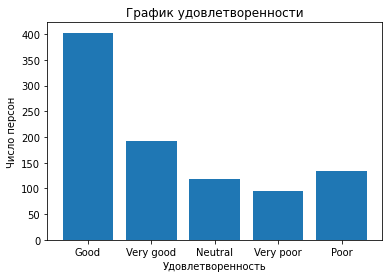

In [15]:
counts_stf = Counter(data_frame['cat5_customerSatisfaction'].dropna())
plt.bar(counts_stf.keys(), counts_stf.values())
plt.title('График удовлетворенности')
plt.xlabel('Удовлетворенность')
plt.ylabel('Число персон')
plt.show()

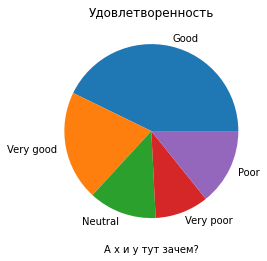

In [16]:
plt.pie(counts_stf.values(), labels=counts_stf.keys())
plt.title('Удовлетворенность')
plt.xlabel('А х и у тут зачем?')
plt.ylabel('')
plt.show()

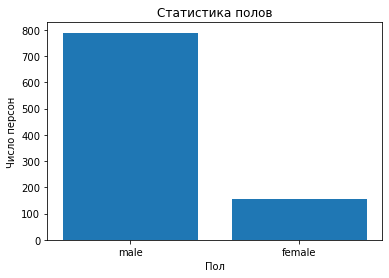

In [17]:
counts_stf = Counter(data_frame['cat1_gender'].dropna())
plt.bar(counts_stf.keys(), counts_stf.values())
plt.title('Статистика полов')
plt.xlabel('Пол')
plt.ylabel('Число персон')
plt.show()

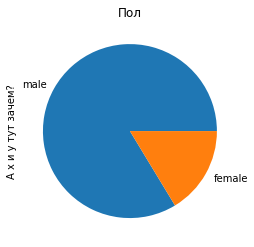

In [18]:
plt.pie(counts_stf.values(), labels=counts_stf.keys())
plt.title("Пол")
plt.xlabel('')
plt.ylabel('А х и у тут зачем?')
plt.show()

## Для чисел

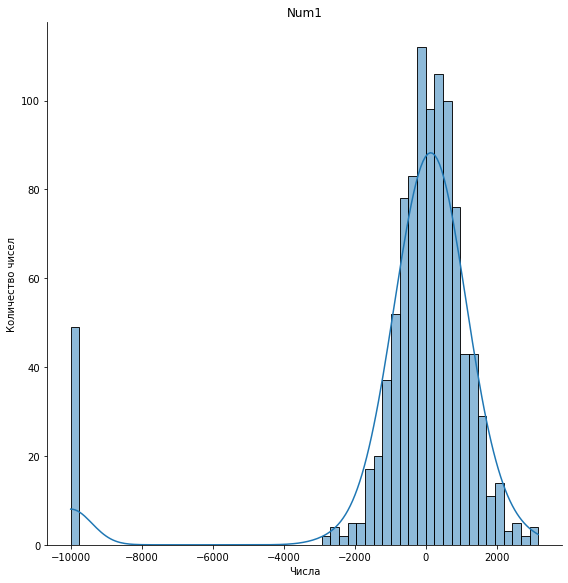

In [19]:
sns.displot(data_frame['num1_10'], kde=True, height=8) # с помощью height можем указывать высоту графика
plt.title('Num1')
plt.xlabel('Числа')
plt.ylabel('Количество чисел')
plt.show()

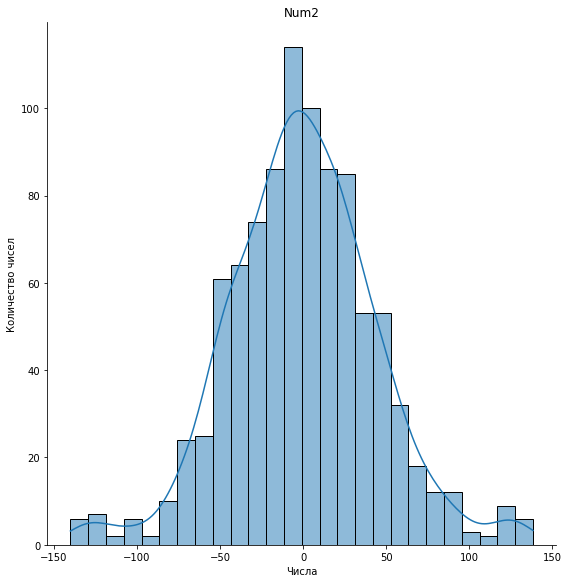

In [20]:
sns.displot(data_frame['num2_10'], kde=True, height=8) # с помощью height можем указывать высоту графика
plt.title('Num2')
plt.xlabel('Числа')
plt.ylabel('Количество чисел')
plt.show()

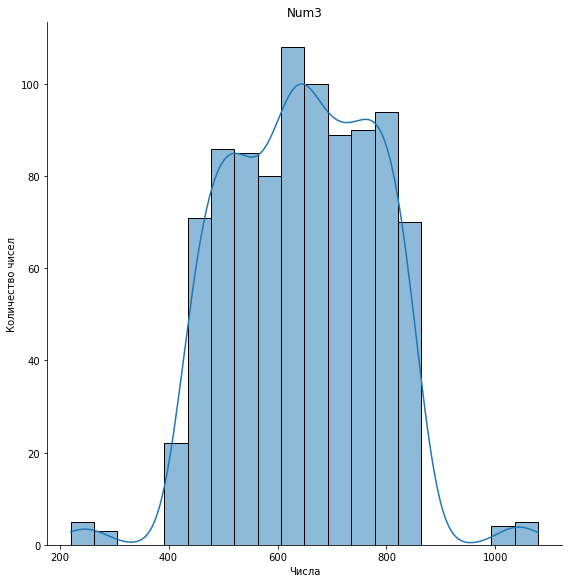

In [21]:
sns.displot(data_frame['num3_10'], kde=True, height=8) # с помощью height можем указывать высоту графика
plt.title('Num3')
plt.xlabel('Числа')
plt.ylabel('Количество чисел')
plt.show()

In [22]:
data_frame.num1_10.unique()

array([ 1.95295111e+03,  2.48952820e+02,  4.65578792e+02,  7.46798307e+02,
       -9.26496601e+01, -9.99900000e+03, -1.53527144e+03, -4.83482864e+01,
        3.80885394e+02,  5.14524019e+02,  6.54142523e+02,  9.97081688e+02,
        3.76556412e+02,  2.20987710e+02,  4.73248391e+02, -1.59548537e+02,
        3.07769486e+02,  5.87799921e+02,  3.43937400e+02, -1.38880016e+02,
        3.87543877e+02,  3.34551226e+02,  9.67451909e+01, -6.72309814e+02,
       -3.91985528e+02,  1.43733495e+03, -5.17282202e+02, -1.23091632e+02,
       -1.99831953e+02, -3.25155295e+02, -1.78590795e+02,  7.24955018e+02,
        1.52389224e+02, -7.06396214e+02, -6.65265218e+02,  6.74613369e+02,
        7.94119658e+02, -4.93724789e+02,  7.67912567e+02,  1.64401688e+03,
        1.12051886e+03,  8.75510934e+02,  1.14779306e+03,  6.06095960e+02,
       -3.55211022e+02,  4.32266057e+02,  2.17657831e+02, -1.27890242e+03,
        4.68394392e+02, -5.89069358e+02,  4.97000164e+02,  1.16857137e+02,
        7.23350290e+02,  

В num1 наблюдается -9999, что было трудно отследить в unique, но он есть на 2 строке, во втором столбце

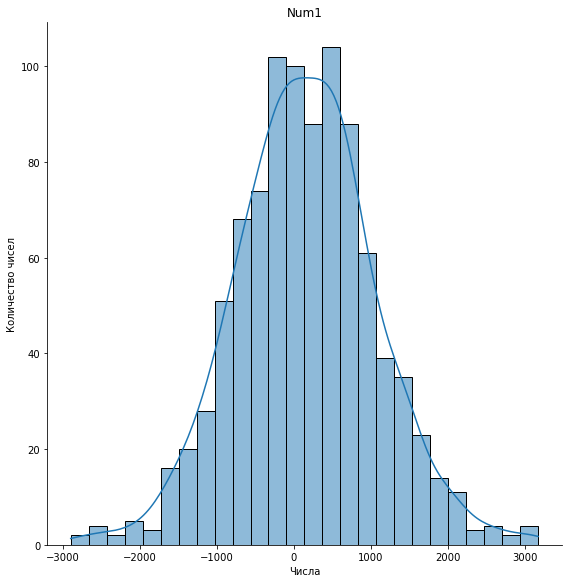

In [23]:
data_frame["num1_10"] = data_frame["num1_10"].replace({-9999 : np.nan})
sns.displot(data_frame['num1_10'], kde=True, height=8) 
plt.title('Num1')
plt.xlabel('Числа')
plt.ylabel('Количество чисел')
plt.show()

Ошибка ушла

## Ящики с усами

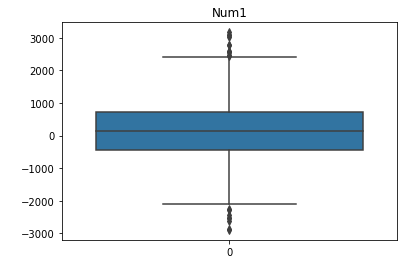

In [24]:
sns.boxplot(data=data_frame['num1_10'])
plt.title('Num1')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

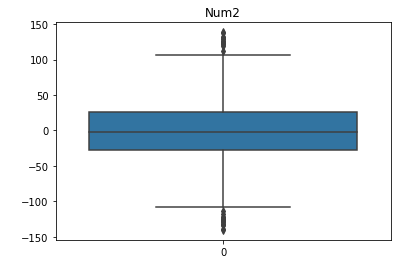

In [25]:
sns.boxplot(data=data_frame['num2_10'])
plt.title('Num2')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

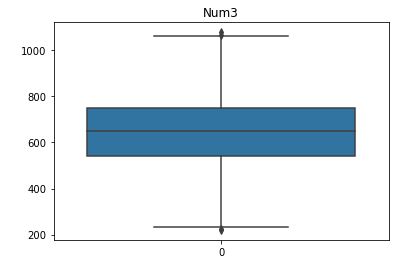

In [26]:
sns.boxplot(data=data_frame['num3_10'])
plt.title('Num3')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

# Тут Задание 3

А тут я додумался расписать все по функциям)))

In [27]:
#Вывод графика
def quick_disp(all_data, data_name):
    if data_name == '':
        sns.displot(all_data, kde=True, height=4)
        plt.title(data_name)
        plt.xlabel('Числа')
        plt.ylabel('Количество чисел')
        plt.show()
    else:
        sns.displot(all_data[data_name], kde=True, height=4)
        plt.title(data_name)
        plt.xlabel('Числа')
        plt.ylabel('Количество чисел')
        plt.show()
#Вывод ящика с усами
def quick_box(all_data, data_name):
    if data_name == '':
        sns.boxplot(data=all_data)
        plt.title(data_name)
        plt.xlabel(' ')
        plt.ylabel(' ')
        plt.show()
    else:
        sns.boxplot(data=all_data[data_name])
        plt.title(data_name)
        plt.xlabel(' ')
        plt.ylabel(' ')
        plt.show()
#Метод квартилей
def func_iqr(data, border_name):
    in_border =[0, 0]
    out_border = [0, 0]
    quant_25 = float("%.6f" % data.quantile(q = 0.25))
    quant_75 = float("%.6f" % data.quantile(q = 0.75))
    # (𝑄1 − 1.5 ∙ (𝑄3 − 𝑄1)), (𝑄3 + 1.5 ∙ (𝑄3 − 𝑄1))
    # из лекции, внутренняя граница
    in_border[0] = float("%.6f" % (quant_25 - 1.5*(quant_75-quant_25)))
    in_border[1] = float("%.6f" % (quant_75 + 1.5*(quant_75-quant_25)))
    # (𝑄1 − 3 ∙ (𝑄3 − 𝑄1)), (𝑄3 + 3 ∙ (𝑄3 − 𝑄1))
    # из лекции, внешняя граница
    out_border[0] = float("%.6f" % (quant_25 - 3*(quant_75-quant_25)))
    out_border[1] = float("%.6f" % (quant_75 + 3*(quant_75-quant_25)))
    if border_name == 'out':
        for c in range(1000):
            if (data[c] < out_border[0] or data[c] > out_border[1]):
                data[c] = np.nan
    elif border_name == 'in':
        for c in range(1000):
            if (data[c] < in_border[0] or data[c] > in_border[1]):
                data[c] = np.nan

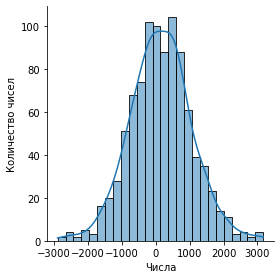

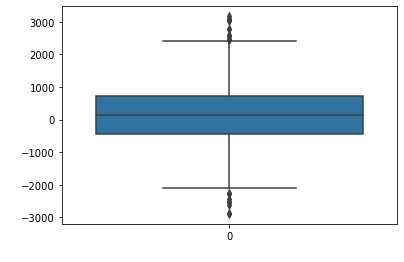

count     951.000000
mean      148.989468
std       906.562059
min     -2896.726311
25%      -441.197859
50%       138.453952
75%       713.803641
max      3172.179061
Name: num1_10, dtype: float64

In [28]:
new_data_1 = data_frame.num1_10.copy()
quick_disp(new_data_1, '')
quick_box(new_data_1, '')
new_data_1.describe()

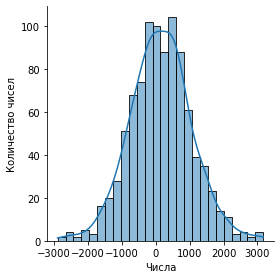

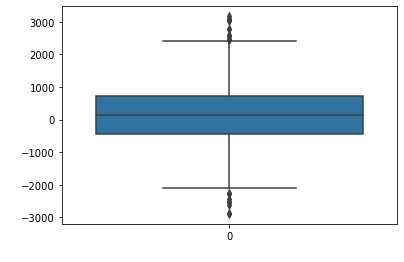

count     951.000000
mean      148.989468
std       906.562059
min     -2896.726311
25%      -441.197859
50%       138.453952
75%       713.803641
max      3172.179061
Name: num1_10, dtype: float64

In [29]:
func_iqr(new_data_1,'out')
quick_disp(new_data_1, '')
quick_box(new_data_1, '')
new_data_1.describe()

Ничего не изменилось, вероятно выбросы незначительные, но I NEED MORE

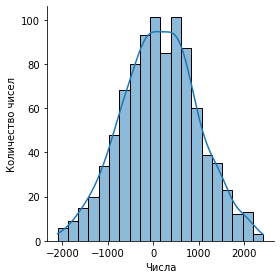

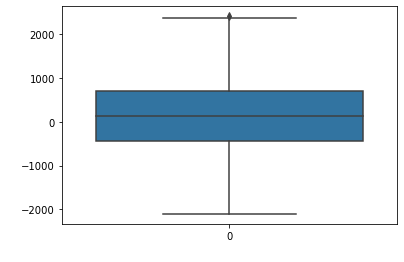

In [30]:
func_iqr(new_data_1, 'in')
quick_disp(new_data_1, '')
quick_box(new_data_1, '')

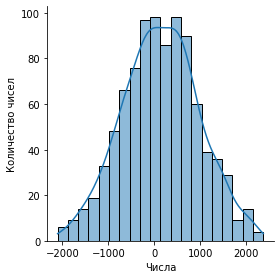

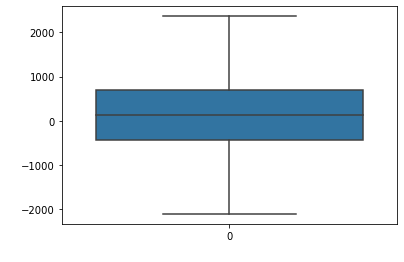

count     931.000000
mean      138.685156
std       829.264222
min     -2105.281514
25%      -434.182620
50%       129.389359
75%       690.432251
max      2366.408565
Name: num1_10, dtype: float64

In [31]:
func_iqr(new_data_1, 'in')
quick_disp(new_data_1, '')
quick_box(new_data_1, '')
new_data_1.describe()

Усы с каждым разом все меньше и меньше... Звучит логично, но странно...

Следующий столбец

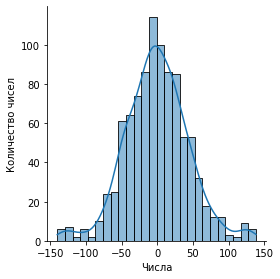

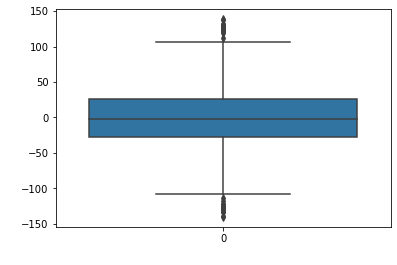

count    952.000000
mean      -0.416448
std       44.123403
min     -140.129425
25%      -27.246439
50%       -1.601830
75%       26.391433
max      138.457461
Name: num2_10, dtype: float64

In [32]:
new_data_2 = data_frame.num2_10.copy()
quick_disp(new_data_2, '')
quick_box(new_data_2, '')
new_data_2.describe()

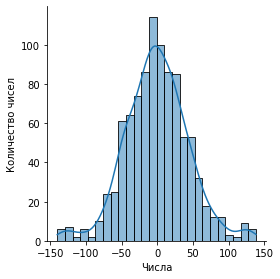

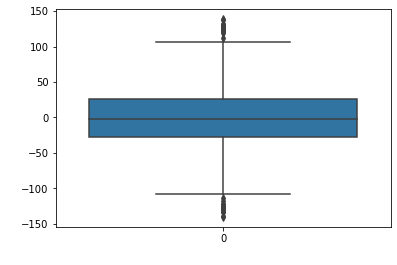

count    952.000000
mean      -0.416448
std       44.123403
min     -140.129425
25%      -27.246439
50%       -1.601830
75%       26.391433
max      138.457461
Name: num2_10, dtype: float64

In [33]:
func_iqr(new_data_2,'out')
quick_disp(new_data_2, '')
quick_box(new_data_2, '')
new_data_2.describe()

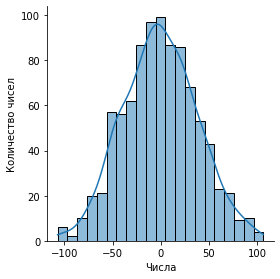

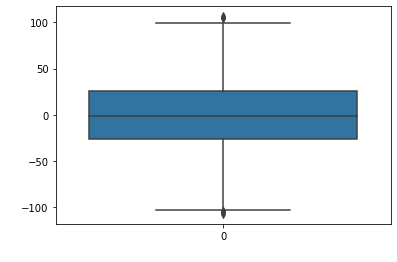

count    921.000000
mean      -0.538574
std       38.330876
min     -107.134055
25%      -25.938511
50%       -1.629052
75%       25.320128
max      106.593607
Name: num2_10, dtype: float64

In [34]:
func_iqr(new_data_2, 'in')
quick_disp(new_data_2, '')
quick_box(new_data_2, '')
new_data_2.describe()

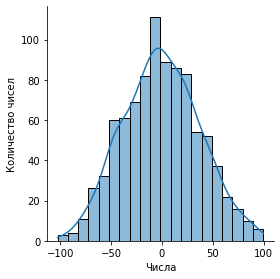

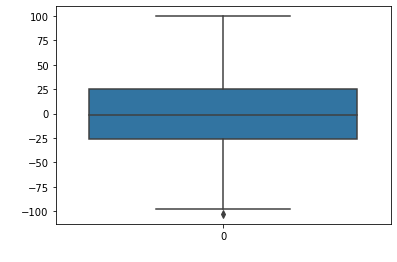

count    914.000000
mean      -0.430008
std       37.361866
min     -102.654248
25%      -25.843455
50%       -1.601830
75%       25.069183
max       99.711831
Name: num2_10, dtype: float64

In [35]:
func_iqr(new_data_2, 'in')
quick_disp(new_data_2, '')
quick_box(new_data_2, '')
new_data_2.describe()

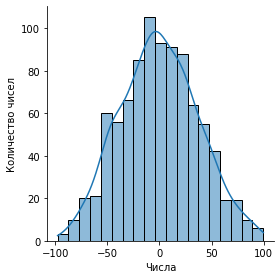

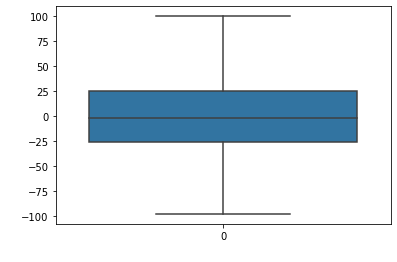

count    913.000000
mean      -0.318043
std       37.228604
min      -97.838619
25%      -25.814768
50%       -1.574607
75%       25.079930
max       99.711831
Name: num2_10, dtype: float64

In [36]:
func_iqr(new_data_2, 'in')
quick_disp(new_data_2, '')
quick_box(new_data_2, '')
new_data_2.describe()

Усов нет, значит хватит.

И последний

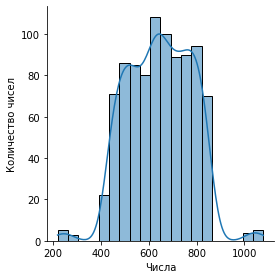

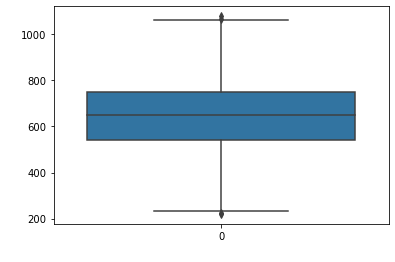

count     912.000000
mean      646.496853
std       132.044057
min       220.302131
25%       541.761379
50%       648.244155
75%       751.201497
max      1078.674453
Name: num3_10, dtype: float64

In [37]:
new_data_3 = data_frame.num3_10.copy()
quick_disp(new_data_3, '')
quick_box(new_data_3, '')
new_data_3.describe()

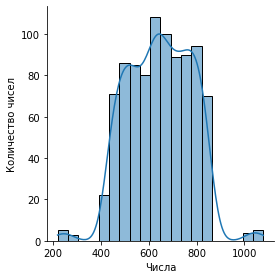

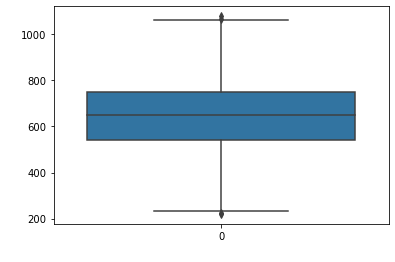

count     912.000000
mean      646.496853
std       132.044057
min       220.302131
25%       541.761379
50%       648.244155
75%       751.201497
max      1078.674453
Name: num3_10, dtype: float64

In [38]:
func_iqr(new_data_3,'out')
quick_disp(new_data_3, '')
quick_box(new_data_3, '')
new_data_3.describe()

Сюрприз, ничего не изменилось

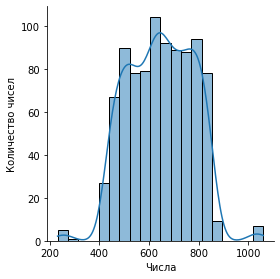

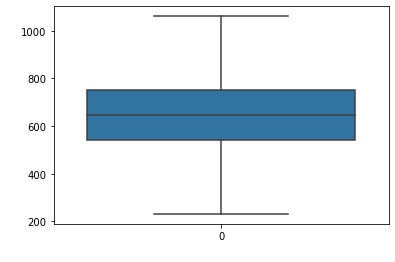

count     908.000000
mean      646.492734
std       129.286890
min       231.363564
25%       542.272110
50%       648.244155
75%       751.144208
max      1060.783937
Name: num3_10, dtype: float64

In [39]:
func_iqr(new_data_3,'in')
quick_disp(new_data_3, '')
quick_box(new_data_3, '')
new_data_3.describe()

Усы уехали, а выбросы остались. Значит... переходим к методу сигм

In [40]:
def my_sigm(data, ratio):
    data_copy = data.dropna()
    res, lower, upper = scipy.stats.sigmaclip(data_copy, ratio, ratio)
    for c in range(1000):
        if (data[c] not in res):
            data[c] = np.nan
    print('ok')

Чисто для проверки ошибок

ok


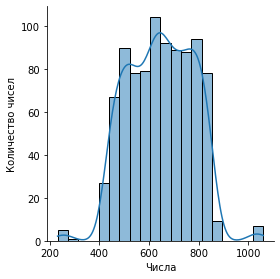

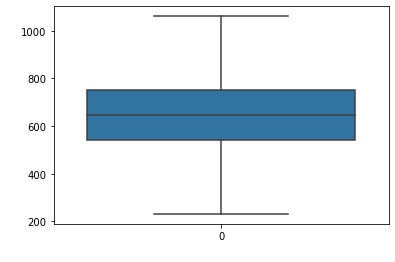

count     908.000000
mean      646.492734
std       129.286890
min       231.363564
25%       542.272110
50%       648.244155
75%       751.144208
max      1060.783937
Name: num3_10, dtype: float64

In [41]:
my_sigm(new_data_3, 5)
quick_disp(new_data_3, '')
quick_box(new_data_3, '')
new_data_3.describe()

А теперь, так как считать лень, по чуть-чуть снижаем до изменения

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


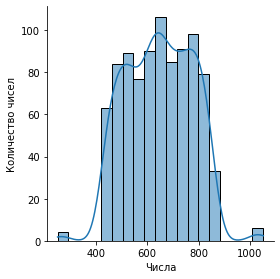

Элементов сейчас:  905
Next?(+/-)  +
ok


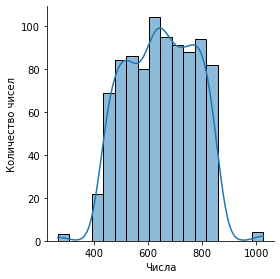

Элементов сейчас:  902
Next?(+/-)  +
ok


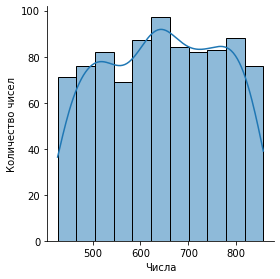

Элементов сейчас:  895
Next?(+/-)  -
Коэффициэнт:  3.0000000000000027


In [42]:
data_count_2 = new_data_3.count()
data_ratio = 5 #Тупо большой коэф
next_slie = '+'
while next_slie == '+':
    data_count_1 = int(new_data_3.count())
    while data_count_1 == data_count_2:
        data_ratio = data_ratio - 0.1
        my_sigm(new_data_3, data_ratio)
        data_count_2 = new_data_3.count()
    quick_disp(new_data_3, '')
    print("Элементов сейчас: ",data_count_2)
    next_slie = input("Next?(+/-)  ")
print("Коэффициэнт: ", data_ratio)



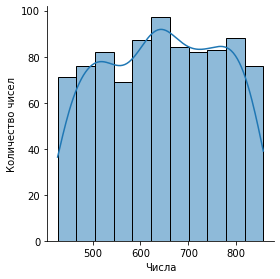

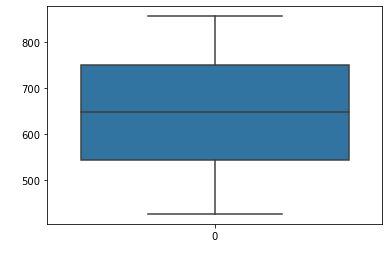

count    895.000000
mean     646.070918
std      121.397970
min      427.052862
25%      543.233286
50%      648.134003
75%      750.005811
max      856.776819
Name: num3_10, dtype: float64

In [43]:
quick_disp(new_data_3, '')
quick_box(new_data_3, '')
new_data_3.describe()

Вообще неплохо было бы применить метод ко всем столбцам, но так как явные выбросы не наблюдаются, смысла в этом немного

Теперь перепишем в новый фрейм

In [44]:
new_frame = data_frame.copy()
new_frame['num1_10'] = new_data_1
new_frame['num2_10'] = new_data_2
new_frame['num3_10'] = new_data_3
new_frame.num1_10.describe()

count     931.000000
mean      138.685156
std       829.264222
min     -2105.281514
25%      -434.182620
50%       129.389359
75%       690.432251
max      2366.408565
Name: num1_10, dtype: float64

In [45]:
new_frame.num2_10.describe()

count    913.000000
mean      -0.318043
std       37.228604
min      -97.838619
25%      -25.814768
50%       -1.574607
75%       25.079930
max       99.711831
Name: num2_10, dtype: float64

In [46]:
new_frame.num3_10.describe()

count    895.000000
mean     646.070918
std      121.397970
min      427.052862
25%      543.233286
50%      648.134003
75%      750.005811
max      856.776819
Name: num3_10, dtype: float64

Вроде все так как и должно быть, продолжаем.

# Задание 4

Собственно задание

1: k-ближайших соседей

2: популярное значение

3: среднее

4: медиана

5: k-ближайших соседей

Начнем с простого, популярное

In [47]:
mode_gender = new_frame.cat1_gender.mode()
mode_gender = mode_gender.all()
new_frame['cat1_gender'] =  new_frame['cat1_gender'].replace({np.nan : mode_gender})
new_frame['cat1_gender'].describe()

count     1000
unique       2
top       male
freq       846
Name: cat1_gender, dtype: object

Среднее

In [48]:
mean_num1 = new_frame.num1_10.mean()
new_frame['num1_10'] =  new_frame['num1_10'].replace({np.nan : mean_num1})
new_frame['num1_10'].describe()

count    1000.000000
mean      138.685156
std       800.113612
min     -2105.281514
25%      -366.560649
50%       138.685156
75%       648.373376
max      2366.408565
Name: num1_10, dtype: float64

Медиана

In [49]:
mid_num2 = new_frame.num2_10.quantile(q = 0.5)
new_frame['num2_10'] =  new_frame['num2_10'].replace({np.nan : mid_num2})
new_frame['num2_10'].describe()

count    1000.000000
mean       -0.427364
std        35.572384
min       -97.838619
25%       -23.408408
50%        -1.574607
75%        22.446095
max        99.711831
Name: num2_10, dtype: float64

k-ближайших для пятого

In [50]:
frame_copy = new_frame.copy()
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(frame_copy[['num1_10', 'num2_10', 'num3_10']])
frame_copy[['num1_10', 'num2_10', 'num3_10']] = scaled_values
enc = OneHotEncoder()
enc_frame = pd.DataFrame(enc.fit_transform(frame_copy[['cat1_gender']]).toarray())
frame_copy = frame_copy.join(enc_frame)
frame_copy.rename(columns={0: 'female', 1: 'male'}, inplace=True)
frame_copy

cat5_customerSatisfaction cat1_gender   num1_10   num2_10   num3_10  \
0                        Good        male  0.907539  0.419409       NaN   
1                        Good        male  0.526475  0.572464  0.458517   
2                        Good        male  0.574919  0.860075       NaN   
3                   Very good        male  0.637808  0.185046  0.641177   
4                   Very good        male  0.450083  0.552972  0.724733   
..                        ...         ...       ...       ...       ...   
995                   Neutral        male  0.193717  0.744188  0.703685   
996                   Neutral        male  0.400739  0.487288  0.476769   
997                      Poor        male  0.671794  0.511646  0.432150   
998                      Good        male  0.362537  0.614149  0.137549   
999                      Good        male  0.481058  0.941597  0.397990   

     female  male  
0       0.0   1.0  
1       0.0   1.0  
2       0.0   1.0  
3       0.0   1.0  
4       0.0   1.0  
..      ...   ...  
995     0.0   1.0  
996     0.0   1.0  
997     0.0   1.0  
998     0.0   1.0  
999     0.0   1.0  

[1000 rows x 7 columns]

In [51]:
knn_inputer = KNNImputer()
input_frame = knn_inputer.fit_transform(frame_copy[['num3_10','num1_10','num2_10','female','male']])
frame_copy['num3_10'] = input_frame[:, 0]
frame_copy

cat5_customerSatisfaction cat1_gender   num1_10   num2_10   num3_10  \
0                        Good        male  0.907539  0.419409  0.579488   
1                        Good        male  0.526475  0.572464  0.458517   
2                        Good        male  0.574919  0.860075  0.359462   
3                   Very good        male  0.637808  0.185046  0.641177   
4                   Very good        male  0.450083  0.552972  0.724733   
..                        ...         ...       ...       ...       ...   
995                   Neutral        male  0.193717  0.744188  0.703685   
996                   Neutral        male  0.400739  0.487288  0.476769   
997                      Poor        male  0.671794  0.511646  0.432150   
998                      Good        male  0.362537  0.614149  0.137549   
999                      Good        male  0.481058  0.941597  0.397990   

     female  male  
0       0.0   1.0  
1       0.0   1.0  
2       0.0   1.0  
3       0.0   1.0  
4       0.0   1.0  
..      ...   ...  
995     0.0   1.0  
996     0.0   1.0  
997     0.0   1.0  
998     0.0   1.0  
999     0.0   1.0  

[1000 rows x 7 columns]

И вот теперь KNN для первого

ОХЕ жалуется на nan

In [52]:
frame_copy["cat5_customerSatisfaction"] = frame_copy["cat5_customerSatisfaction"].replace({np.nan : ''})
enc = OneHotEncoder()
enc_frame = pd.DataFrame(enc.fit_transform(frame_copy[['cat5_customerSatisfaction']]).toarray())
frame_copy = frame_copy.join(enc_frame)
frame_copy.rename(columns={0: 'nan', 1: 'Good', 2: 'Neutral', 
                           3: 'Poor', 4: 'Very good', 5: 'Very poor'}, inplace=True)
frame_copy

cat5_customerSatisfaction cat1_gender   num1_10   num2_10   num3_10  \
0                        Good        male  0.907539  0.419409  0.579488   
1                        Good        male  0.526475  0.572464  0.458517   
2                        Good        male  0.574919  0.860075  0.359462   
3                   Very good        male  0.637808  0.185046  0.641177   
4                   Very good        male  0.450083  0.552972  0.724733   
..                        ...         ...       ...       ...       ...   
995                   Neutral        male  0.193717  0.744188  0.703685   
996                   Neutral        male  0.400739  0.487288  0.476769   
997                      Poor        male  0.671794  0.511646  0.432150   
998                      Good        male  0.362537  0.614149  0.137549   
999                      Good        male  0.481058  0.941597  0.397990   

     female  male  nan  Good  Neutral  Poor  Very good  Very poor  
0       0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0  
1       0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0  
2       0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0  
3       0.0   1.0  0.0   0.0      0.0   0.0        1.0        0.0  
4       0.0   1.0  0.0   0.0      0.0   0.0        1.0        0.0  
..      ...   ...  ...   ...      ...   ...        ...        ...  
995     0.0   1.0  0.0   0.0      1.0   0.0        0.0        0.0  
996     0.0   1.0  0.0   0.0      1.0   0.0        0.0        0.0  
997     0.0   1.0  0.0   0.0      0.0   1.0        0.0        0.0  
998     0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0  
999     0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0  

[1000 rows x 13 columns]

Хотел бы я сказать что наконец кнн...

In [53]:
for c in range(1000):
    if frame_copy['nan'][c] == 1:
        frame_copy['Good'][c] = np.nan
        frame_copy['Neutral'][c] = np.nan
        frame_copy['Poor'][c] = np.nan
        frame_copy['Very good'][c] = np.nan
        frame_copy['Very poor'][c] = np.nan

<ipython-input-53-3ef284259ffa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_copy['Good'][c] = np.nan
<ipython-input-53-3ef284259ffa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_copy['Neutral'][c] = np.nan
<ipython-input-53-3ef284259ffa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_copy['Poor'][c] = np.nan
<ipython-input-53-3ef284259ffa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [54]:
knn_inputer = KNNImputer()
input_frame = knn_inputer.fit_transform(frame_copy[['Good', 'Neutral','Poor', 'Very good','Very poor','num3_10','num1_10','num2_10','female','male']])
frame_copy['Good'] = input_frame[:, 0]
input_frame = knn_inputer.fit_transform(frame_copy[['Neutral','Poor', 'Very good','Very poor', 'Good','num3_10','num1_10','num2_10','female','male']])
frame_copy['Neutral'] = input_frame[:, 0]
input_frame = knn_inputer.fit_transform(frame_copy[['Poor', 'Very good','Very poor','Good', 'Neutral','num3_10','num1_10','num2_10','female','male']])
frame_copy['Poor'] = input_frame[:, 0]
input_frame = knn_inputer.fit_transform(frame_copy[['Very good','Very poor','Good', 'Neutral','Poor', 'num3_10','num1_10','num2_10','female','male']])
frame_copy['Very good'] = input_frame[:, 0]
input_frame = knn_inputer.fit_transform(frame_copy[['Very poor', 'Good', 'Neutral','Poor', 'Very good','num3_10','num1_10','num2_10','female','male']])
frame_copy['Very poor'] = input_frame[:, 0]
for c in range(1000): 
    if frame_copy['nan'][c] == 1:
        good = (frame_copy['Good'][c] >= frame_copy['Neutral'][c] and
                frame_copy['Good'][c] >= frame_copy['Poor'][c] and
                frame_copy['Good'][c] >= frame_copy['Very good'][c] and
                frame_copy['Good'][c] >= frame_copy['Very poor'][c])
        neutral = (frame_copy['Neutral'][c] >= frame_copy['Good'][c] and
                   frame_copy['Neutral'][c] >= frame_copy['Poor'][c] and
                   frame_copy['Neutral'][c] >= frame_copy['Very good'][c] and
                   frame_copy['Neutral'][c] >= frame_copy['Very poor'][c])
        poor = (frame_copy['Poor'][c] >= frame_copy['Neutral'][c] and
                frame_copy['Poor'][c] >= frame_copy['Good'][c] and
                frame_copy['Poor'][c] >= frame_copy['Very good'][c] and
                frame_copy['Poor'][c] >= frame_copy['Very poor'][c])
        v_good = (frame_copy['Very good'][c] >= frame_copy['Neutral'][c] and
                  frame_copy['Very good'][c] >= frame_copy['Poor'][c] and
                  frame_copy['Very good'][c] >= frame_copy['Good'][c] and
                  frame_copy['Very good'][c] >= frame_copy['Very poor'][c])
        v_poor = (frame_copy['Very poor'][c] >= frame_copy['Neutral'][c] and
                  frame_copy['Very poor'][c] >= frame_copy['Poor'][c] and
                  frame_copy['Very poor'][c] >= frame_copy['Very good'][c] and
                  frame_copy['Very poor'][c] >= frame_copy['Good'][c])
        if good:
            frame_copy['Good'][c] = 1
            frame_copy['Neutral'][c] = 0
            frame_copy['Poor'][c] = 0
            frame_copy['Very good'][c] = 0
            frame_copy['Very poor'][c] = 0
        elif neutral:
            frame_copy['Good'][c] = 0
            frame_copy['Neutral'][c] = 1
            frame_copy['Poor'][c] = 0
            frame_copy['Very good'][c] = 0
            frame_copy['Very poor'][c] = 0
        elif poor:
            frame_copy['Good'][c] = 0
            frame_copy['Neutral'][c] = 0
            frame_copy['Poor'][c] = 1
            frame_copy['Very good'][c] = 0
            frame_copy['Very poor'][c] = 0
        elif v_good:
            frame_copy['Good'][c] = 0
            frame_copy['Neutral'][c] = 0
            frame_copy['Poor'][c] = 0
            frame_copy['Very good'][c] = 1
            frame_copy['Very poor'][c] = 0
        elif v_poor:
            frame_copy['Good'][c] = 0
            frame_copy['Neutral'][c] = 0
            frame_copy['Poor'][c] = 0
            frame_copy['Very good'][c] = 0
            frame_copy['Very poor'][c] = 1

<ipython-input-54-5aa7f6bf865a>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_copy['Good'][c] = 0
<ipython-input-54-5aa7f6bf865a>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_copy['Neutral'][c] = 0
<ipython-input-54-5aa7f6bf865a>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_copy['Poor'][c] = 0
<ipython-input-54-5aa7f6bf865a>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [55]:
frame_copy['nan'] = frame_copy['nan'].replace({1: 0})
enc_frame = pd.DataFrame(enc.inverse_transform(frame_copy[['nan', 'Good','Neutral','Poor', 'Very good', 'Very poor']]))
frame_copy = frame_copy.join(enc_frame)
frame_copy

cat5_customerSatisfaction cat1_gender   num1_10   num2_10   num3_10  \
0                        Good        male  0.907539  0.419409  0.579488   
1                        Good        male  0.526475  0.572464  0.458517   
2                        Good        male  0.574919  0.860075  0.359462   
3                   Very good        male  0.637808  0.185046  0.641177   
4                   Very good        male  0.450083  0.552972  0.724733   
..                        ...         ...       ...       ...       ...   
995                   Neutral        male  0.193717  0.744188  0.703685   
996                   Neutral        male  0.400739  0.487288  0.476769   
997                      Poor        male  0.671794  0.511646  0.432150   
998                      Good        male  0.362537  0.614149  0.137549   
999                      Good        male  0.481058  0.941597  0.397990   

     female  male  nan  Good  Neutral  Poor  Very good  Very poor          0  
0       0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0       Good  
1       0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0       Good  
2       0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0       Good  
3       0.0   1.0  0.0   0.0      0.0   0.0        1.0        0.0  Very good  
4       0.0   1.0  0.0   0.0      0.0   0.0        1.0        0.0  Very good  
..      ...   ...  ...   ...      ...   ...        ...        ...        ...  
995     0.0   1.0  0.0   0.0      1.0   0.0        0.0        0.0    Neutral  
996     0.0   1.0  0.0   0.0      1.0   0.0        0.0        0.0    Neutral  
997     0.0   1.0  0.0   0.0      0.0   1.0        0.0        0.0       Poor  
998     0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0       Good  
999     0.0   1.0  0.0   1.0      0.0   0.0        0.0        0.0       Good  

[1000 rows x 14 columns]

Смотреть неприятно, так что перенесу в new_frame

In [56]:
le = LabelEncoder()
new_frame['cat5_customerSatisfaction'] = frame_copy[0]
new_frame['num1_10'] = frame_copy['num1_10']
new_frame['num2_10'] = frame_copy['num2_10']
new_frame['num3_10'] = frame_copy['num3_10']
new_frame['gender_lb'] = le.fit_transform(new_frame['cat1_gender'])
new_frame['nan'] = frame_copy['nan']
new_frame['Good'] = frame_copy['Good']
new_frame['Neutral'] = frame_copy['Neutral']
new_frame['Poor'] = frame_copy['Poor']
new_frame['Very good'] = frame_copy['Very good']
new_frame['Very poor'] = frame_copy['Very poor']
new_frame

cat5_customerSatisfaction cat1_gender   num1_10   num2_10   num3_10  \
0                        Good        male  0.907539  0.419409  0.579488   
1                        Good        male  0.526475  0.572464  0.458517   
2                        Good        male  0.574919  0.860075  0.359462   
3                   Very good        male  0.637808  0.185046  0.641177   
4                   Very good        male  0.450083  0.552972  0.724733   
..                        ...         ...       ...       ...       ...   
995                   Neutral        male  0.193717  0.744188  0.703685   
996                   Neutral        male  0.400739  0.487288  0.476769   
997                      Poor        male  0.671794  0.511646  0.432150   
998                      Good        male  0.362537  0.614149  0.137549   
999                      Good        male  0.481058  0.941597  0.397990   

     gender_lb  nan  Good  Neutral  Poor  Very good  Very poor  
0            1  0.0   1.0      0.0   0.0        0.0        0.0  
1            1  0.0   1.0      0.0   0.0        0.0        0.0  
2            1  0.0   1.0      0.0   0.0        0.0        0.0  
3            1  0.0   0.0      0.0   0.0        1.0        0.0  
4            1  0.0   0.0      0.0   0.0        1.0        0.0  
..         ...  ...   ...      ...   ...        ...        ...  
995          1  0.0   0.0      1.0   0.0        0.0        0.0  
996          1  0.0   0.0      1.0   0.0        0.0        0.0  
997          1  0.0   0.0      0.0   1.0        0.0        0.0  
998          1  0.0   1.0      0.0   0.0        0.0        0.0  
999          1  0.0   1.0      0.0   0.0        0.0        0.0  

[1000 rows x 12 columns]